In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
titanic_gender_submission = pd.read_csv('gender_submission.csv')

In [128]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

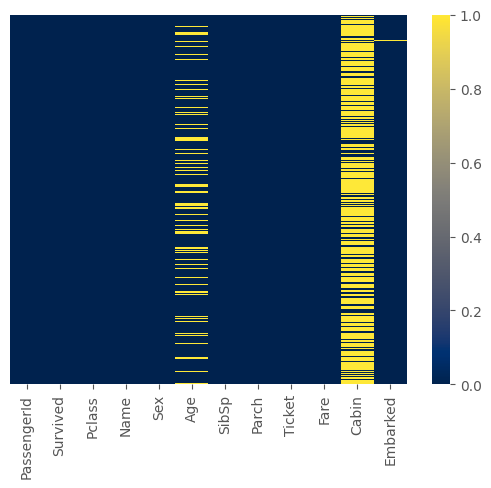

In [64]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cmap='cividis')

In [23]:
titanic_train.shape

(891, 12)

In [15]:
titanic_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [26]:
list(titanic_train['Survived'].value_counts().keys())

[0, 1]

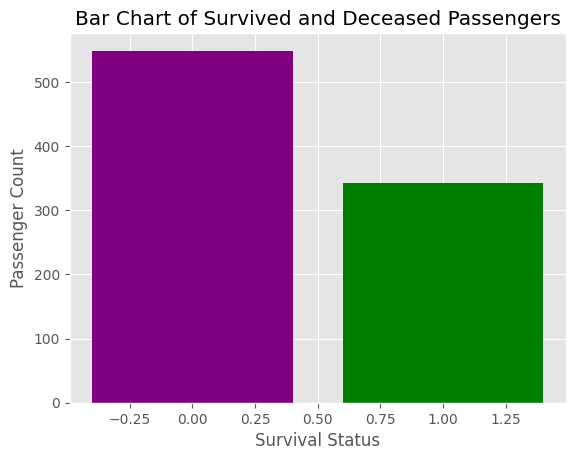

In [56]:
plt.bar(list(titanic_train['Survived'].value_counts().keys()), list(titanic_train['Survived'].value_counts()), color=['purple', 'green'])
plt.title('Bar Chart of Survived and Deceased Passengers')
plt.xlabel('Survival Status')
plt.ylabel('Passenger Count')
plt.show()

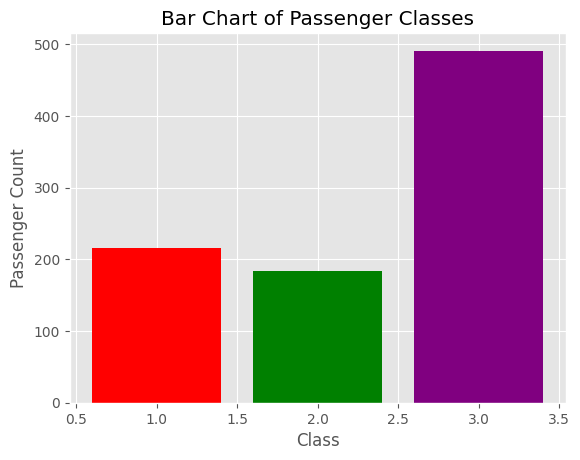

In [55]:
plt.bar(list(titanic_train['Pclass'].value_counts().keys()), list(titanic_train['Pclass'].value_counts()), color=['purple', 'red', 'green'])
plt.title('Bar Chart of Passenger Classes')
plt.xlabel('Class')
plt.ylabel('Passenger Count')
plt.show()

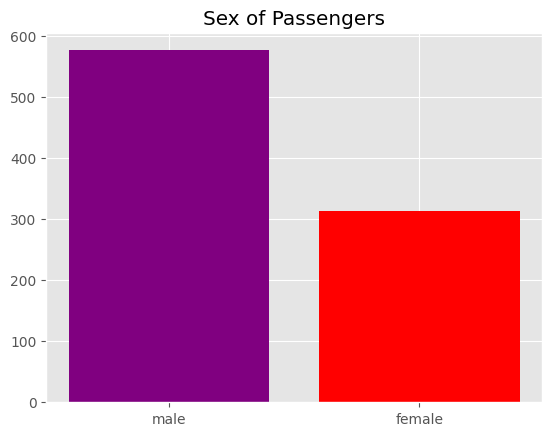

In [54]:
plt.bar(list(titanic_train['Sex'].value_counts().keys()), list(titanic_train['Sex'].value_counts()), color=['purple', 'red'])
plt.title('Sex of Passengers')
plt.show()

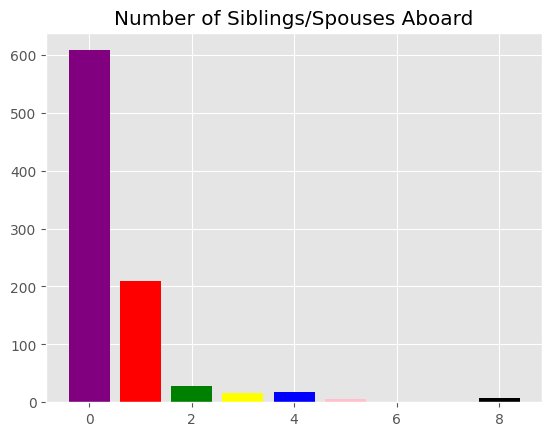

In [53]:
plt.bar(list(titanic_train['SibSp'].value_counts().keys()), list(titanic_train['SibSp'].value_counts()), color=['purple', 'red', 'green', 'blue', 'yellow', 'black', 'pink'])
plt.title('Number of Siblings/Spouses Aboard')
plt.show()

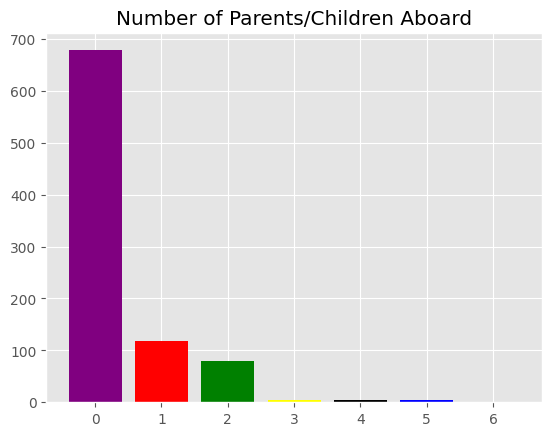

In [52]:
plt.bar(list(titanic_train['Parch'].value_counts().keys()), list(titanic_train['Parch'].value_counts()), color=['purple', 'red', 'green', 'blue', 'yellow', 'black'])
plt.title('Number of Parents/Children Aboard')
plt.show()

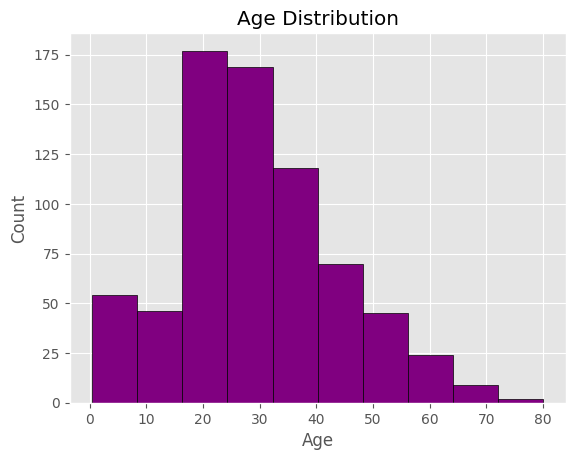

In [51]:
plt.style.use('ggplot')
plt.hist(titanic_train['Age'] , color='purple' , edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

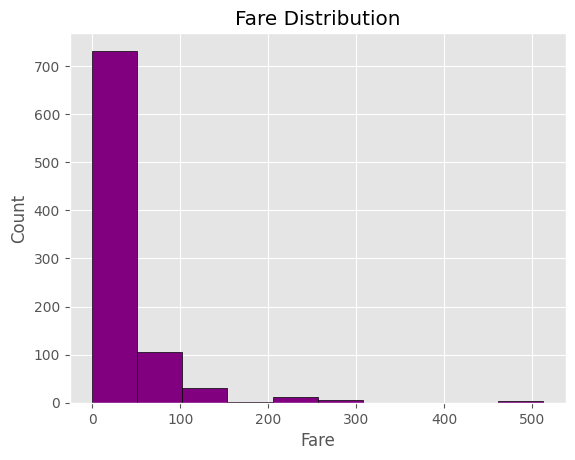

In [58]:
plt.hist(titanic_train['Fare'] , color='purple' , edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

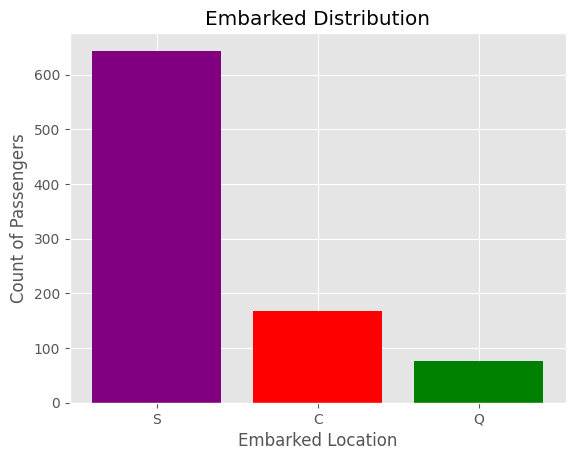

In [60]:
plt.bar(list(titanic_train['Embarked'].value_counts().keys()), list(titanic_train['Embarked'].value_counts()), color=['purple', 'red', 'green'])
plt.title('Embarked Distribution')
plt.xlabel('Embarked Location')
plt.ylabel('Count of Passengers')
plt.show()

In [61]:
sum(titanic_train['Cabin'].isnull())

687

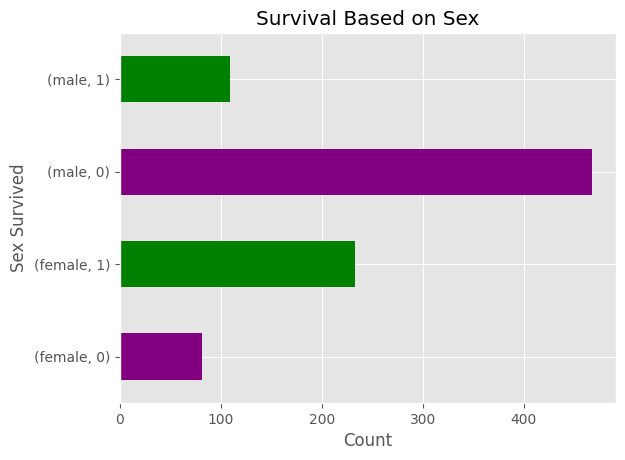

In [67]:
titanic_train.groupby(['Sex','Survived']).size().plot(kind='barh', color=['purple', 'green'])
plt.title('Survival Based on Sex')
plt.xlabel('Count')
plt.ylabel('Sex Survived')
plt.show()

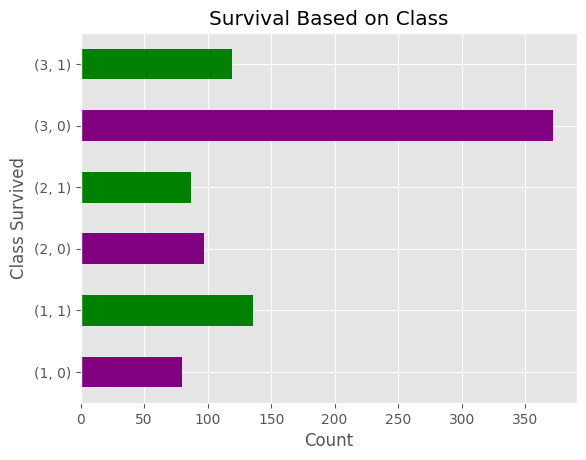

In [68]:
titanic_train.groupby(['Pclass','Survived']).size().plot(kind='barh', color=['purple', 'green'])
plt.title('Survival Based on Class')
plt.xlabel('Count')
plt.ylabel('Class Survived')
plt.show()

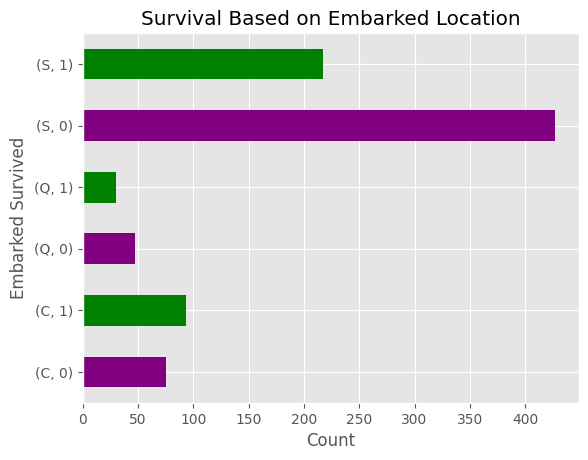

In [69]:
titanic_train.groupby(['Embarked','Survived']).size().plot(kind='barh', color=['purple', 'green'])
plt.title('Survival Based on Embarked Location')
plt.xlabel('Count')
plt.ylabel('Embarked Survived')
plt.show()

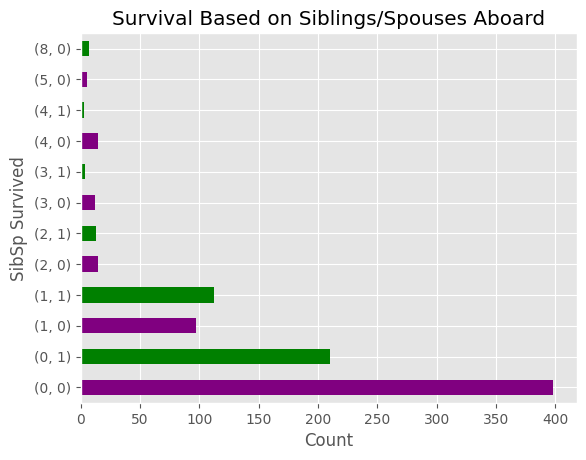

In [70]:
titanic_train.groupby(['SibSp','Survived']).size().plot(kind='barh', color=['purple', 'green'])
plt.title('Survival Based on Siblings/Spouses Aboard')
plt.xlabel('Count')
plt.ylabel('SibSp Survived')
plt.show()

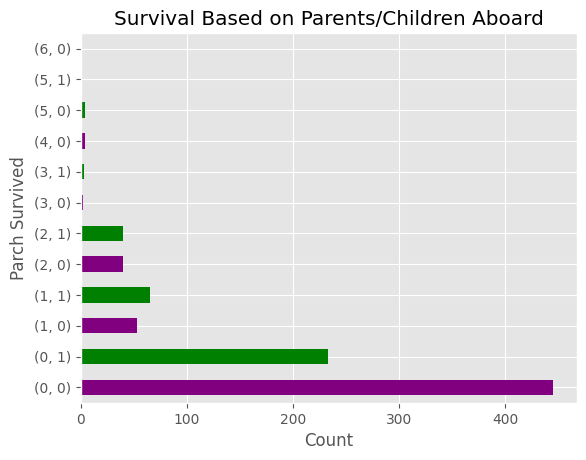

In [71]:
titanic_train.groupby(['Parch','Survived']).size().plot(kind='barh', color=['purple', 'green'])
plt.title('Survival Based on Parents/Children Aboard')
plt.xlabel('Count')
plt.ylabel('Parch Survived')
plt.show()

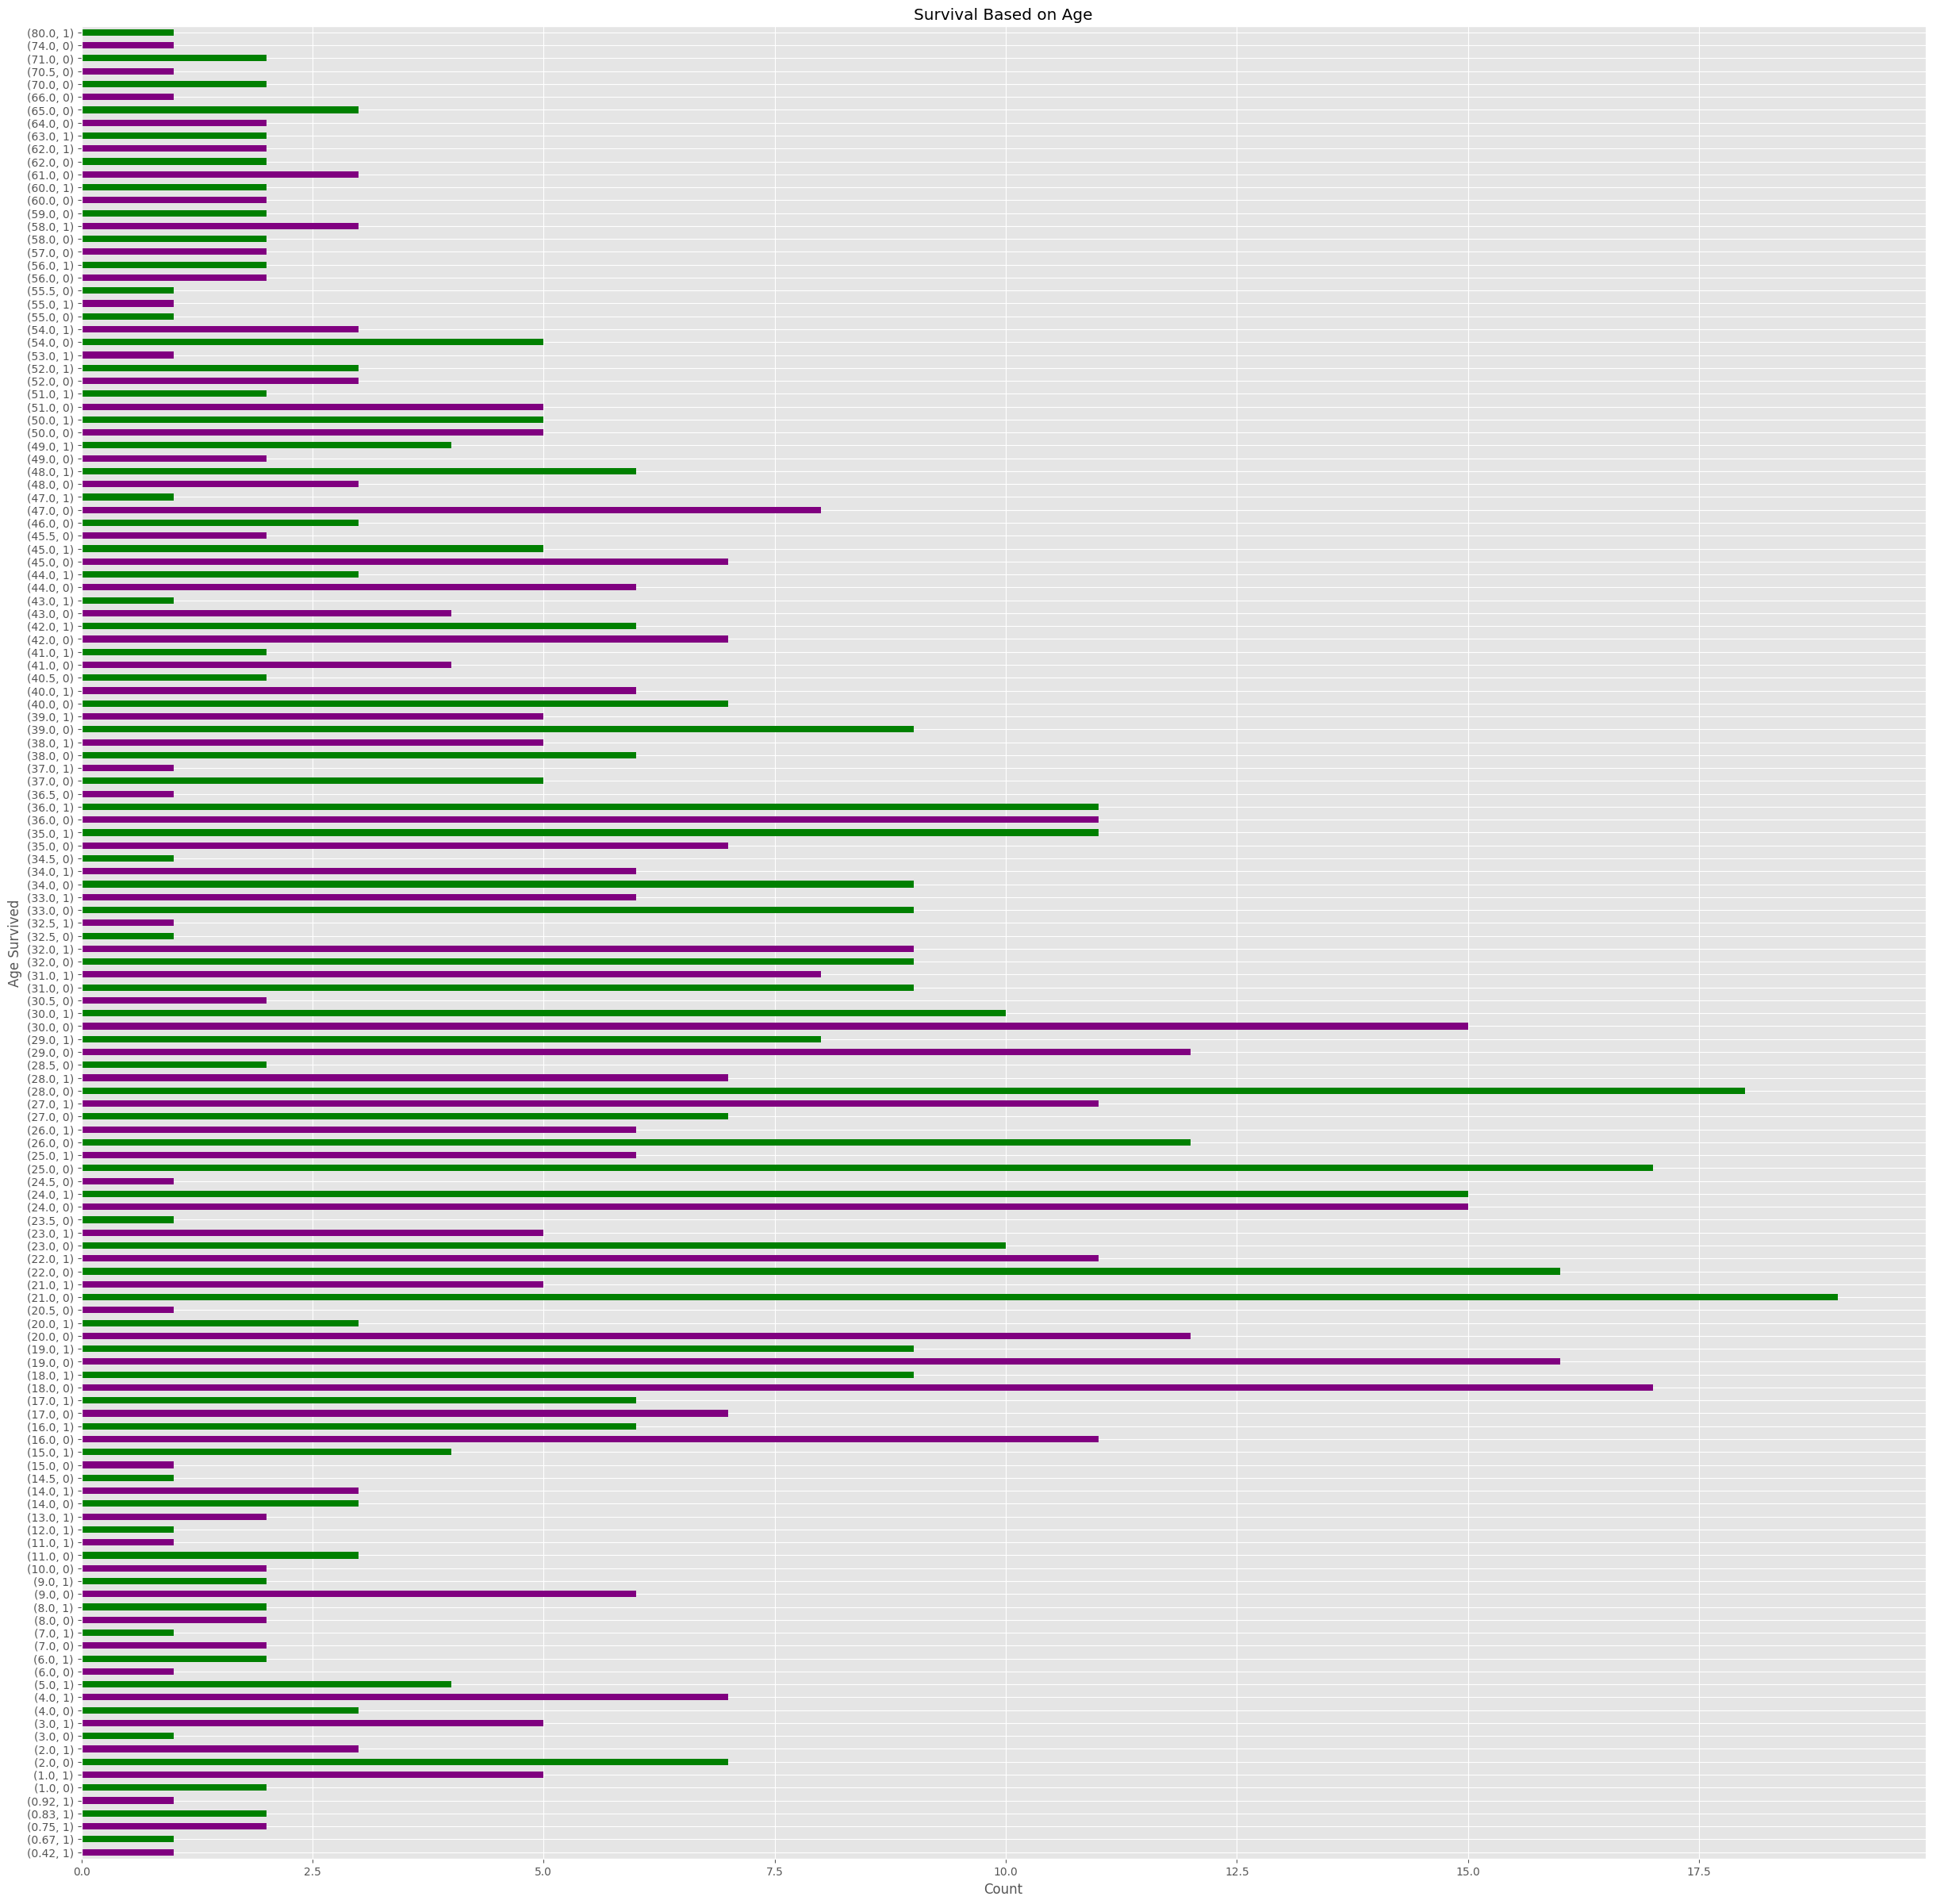

In [81]:
titanic_train.groupby(['Age','Survived']).size().plot(kind='barh', color=['purple', 'green'] , figsize=(30,30))
plt.title('Survival Based on Age')
plt.xlabel('Count')
plt.ylabel('Age Survived')
plt.show()

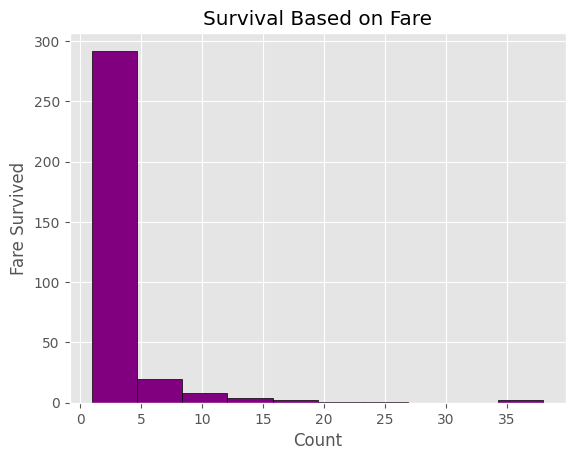

In [86]:
titanic_train.groupby(['Fare','Survived']).size().plot(kind='hist', color=['purple', 'green'] , edgecolor='black')
plt.title('Survival Based on Fare')
plt.xlabel('Count')
plt.ylabel('Fare Survived')
plt.show()

In [129]:
titanic_train['Family_size'] = titanic_train['SibSp'] + titanic_train['Parch']+1


In [130]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [90]:
titanic_train = titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [91]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


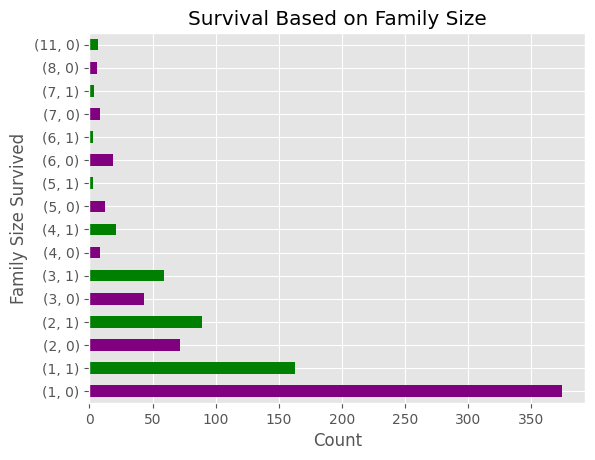

In [92]:
titanic_train.groupby(['Family_size','Survived']).size().plot(kind='barh', color=['purple', 'green'])
plt.title('Survival Based on Family Size')
plt.xlabel('Count')
plt.ylabel('Family Size Survived')
plt.show()

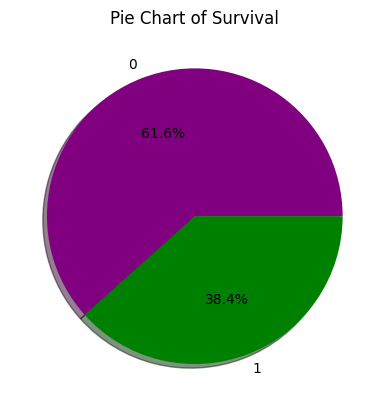

In [8]:
plt.pie(titanic_train ['Survived'].value_counts(), labels=titanic_train ['Survived'].value_counts().keys(), autopct='%0.1f%%', colors=['purple', 'green'] , shadow=True)
plt.title('Pie Chart of Survival')
plt.show()

In [116]:
titanic_train.dropna(inplace=True)

In [117]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: >

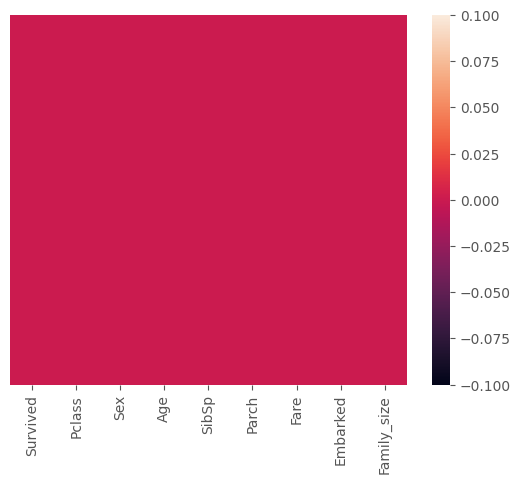

In [107]:
sns.heatmap(titanic_train.isnull(), yticklabels=False)

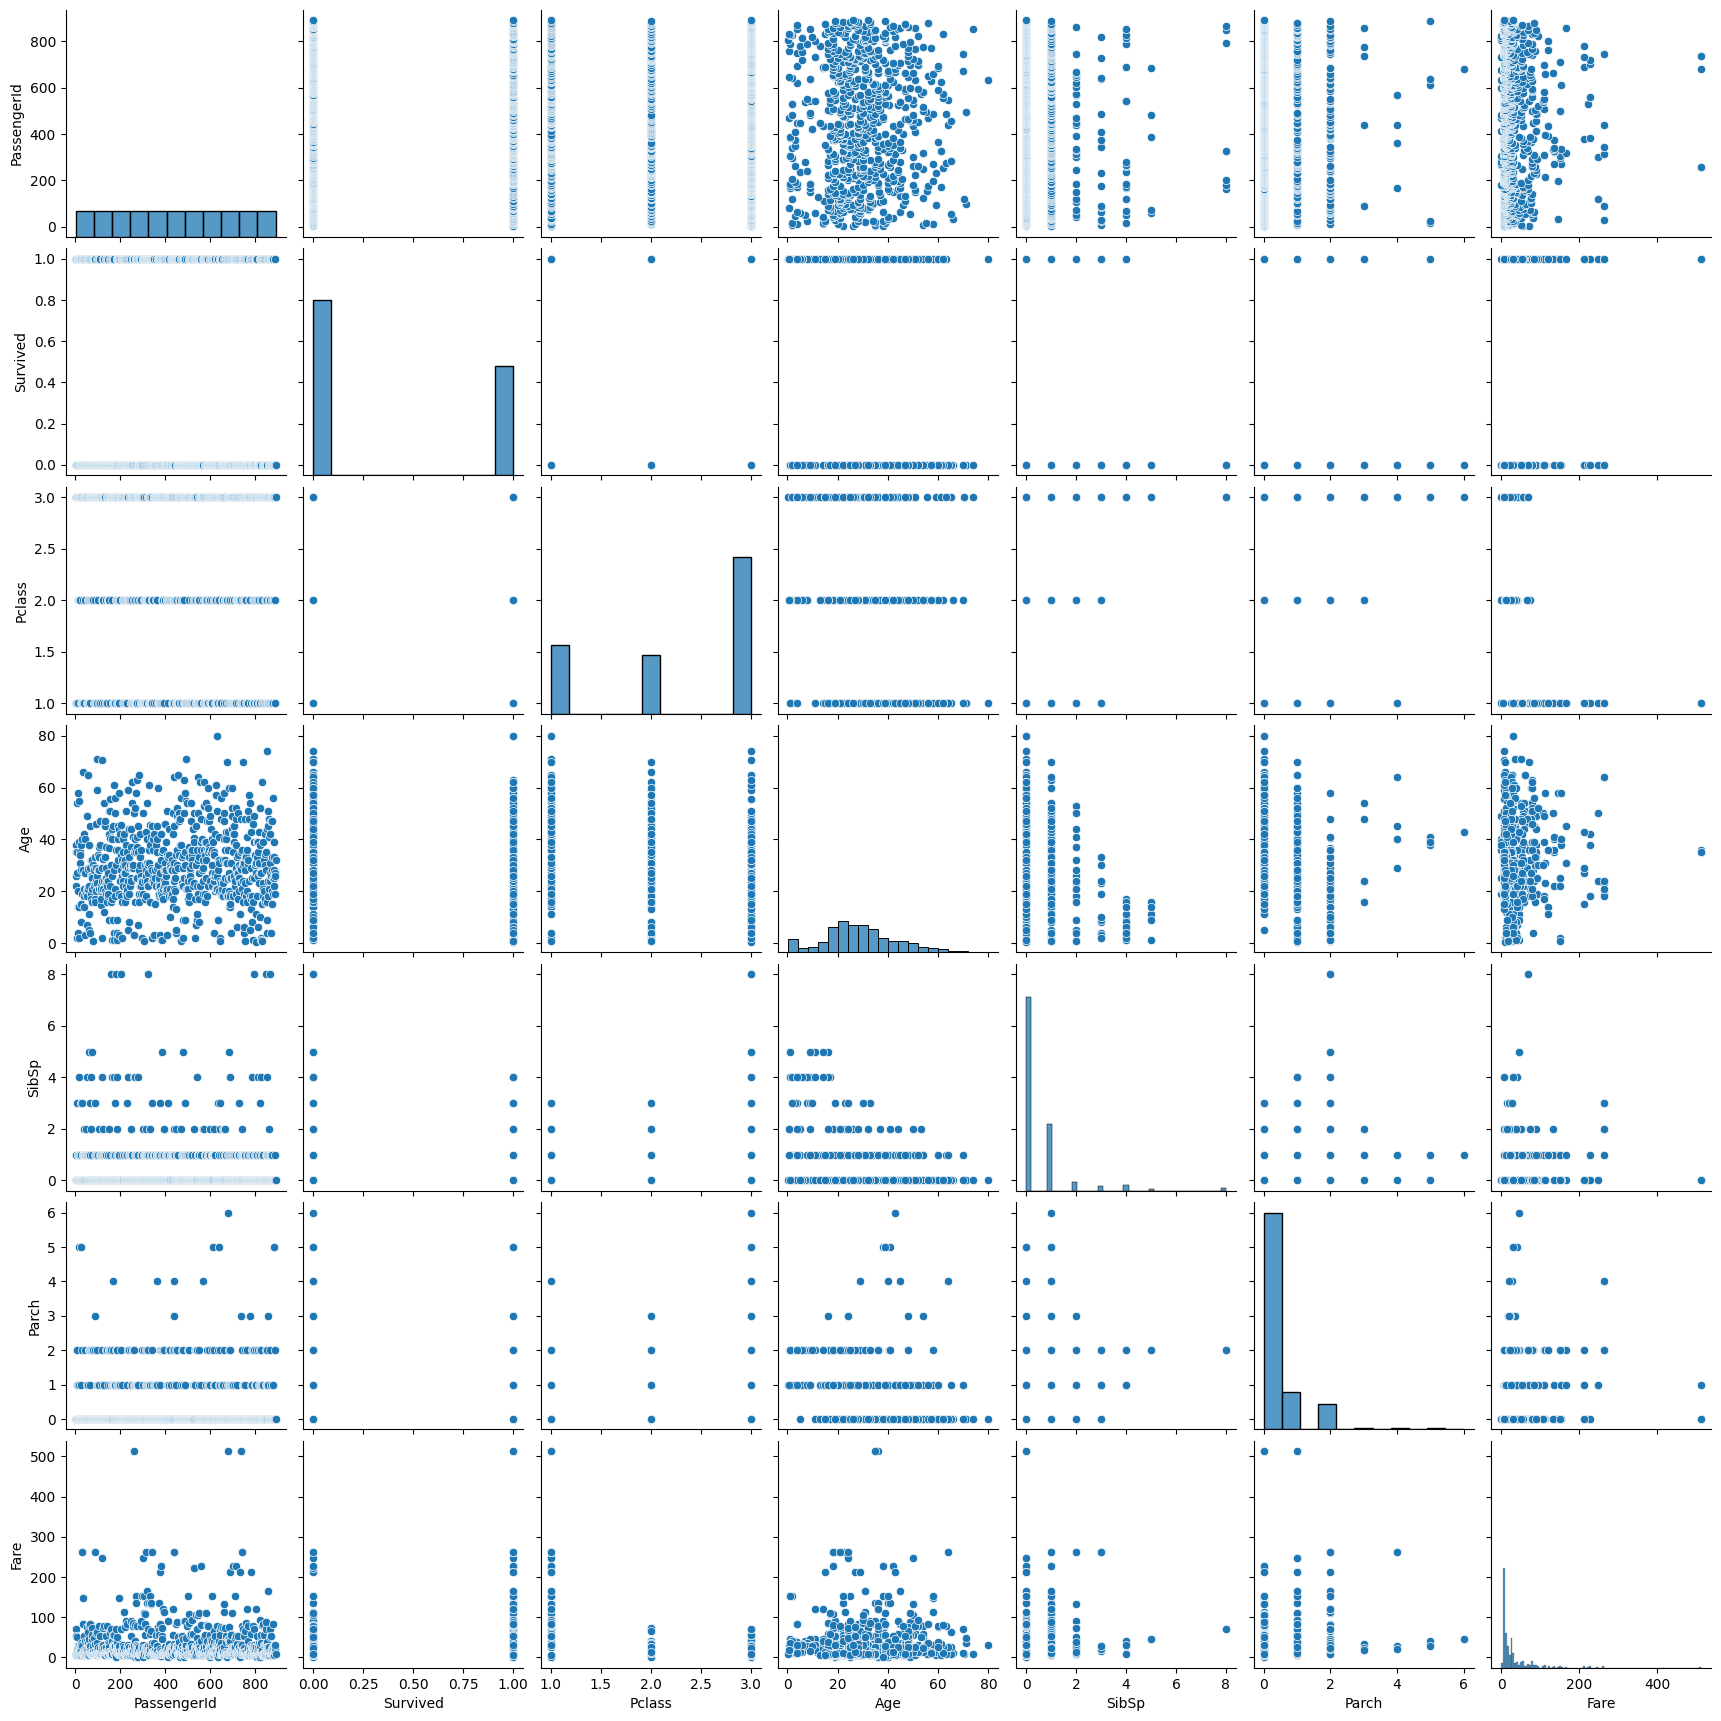

In [14]:
sns.pairplot(titanic_train)

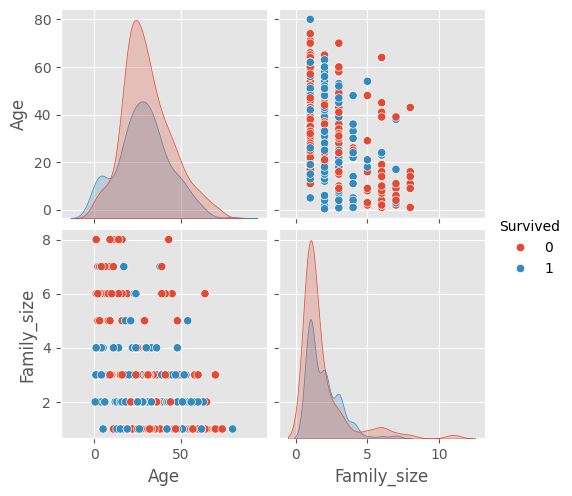

In [131]:
sns.pairplot(titanic_train[['Age', 'Family_size', 'Survived']], hue='Survived')

Text(0.5, 1.0, 'Survival Based on Sex')

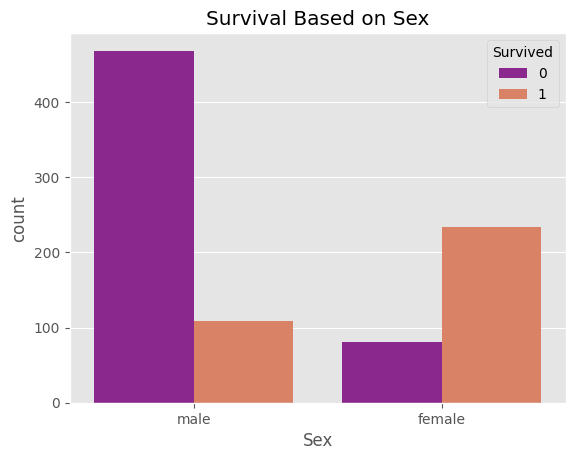

In [140]:
sns.countplot(x = 'Sex', hue = 'Survived' , data = titanic_train , palette='plasma')
plt.title('Survival Based on Sex')

Text(0.5, 1.0, 'Survival Based on Class')

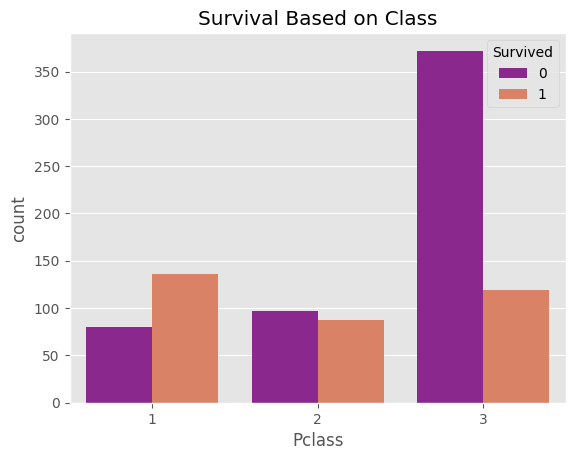

In [141]:
sns.countplot(x = 'Pclass', hue = 'Survived' , data = titanic_train , palette='plasma')
plt.title('Survival Based on Class')

Text(0.5, 1.0, 'Survival Based on Embarked Location')

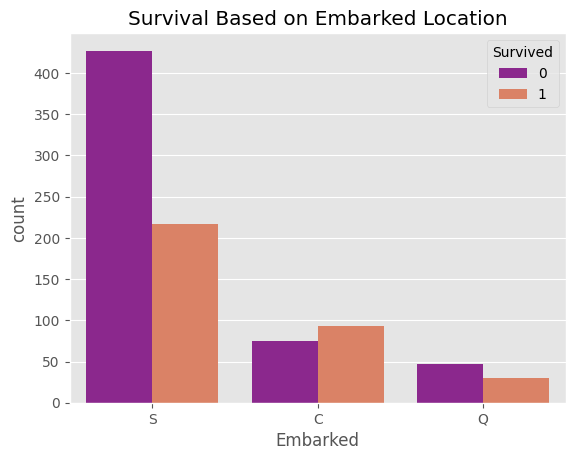

In [142]:
sns.countplot(x = 'Embarked', hue = 'Survived' , data = titanic_train , palette='plasma')
plt.title('Survival Based on Embarked Location')

Text(0.5, 1.0, 'Survival Based on Siblings/Spouses Aboard')

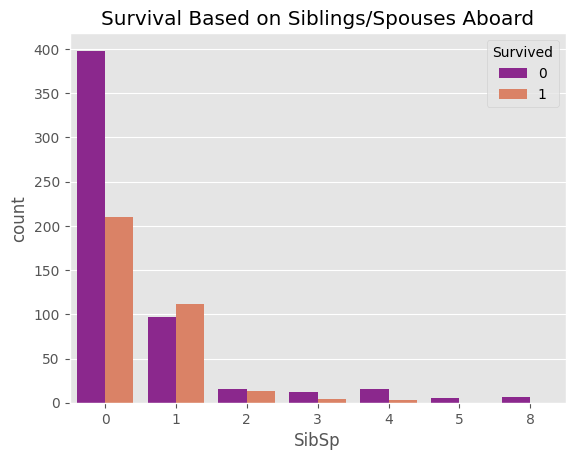

In [144]:
sns.countplot(x = 'SibSp', hue = 'Survived' , data = titanic_train , palette='plasma')
plt.title('Survival Based on Siblings/Spouses Aboard')

Text(0.5, 1.0, 'Survival Based on Parents/Children Aboard')

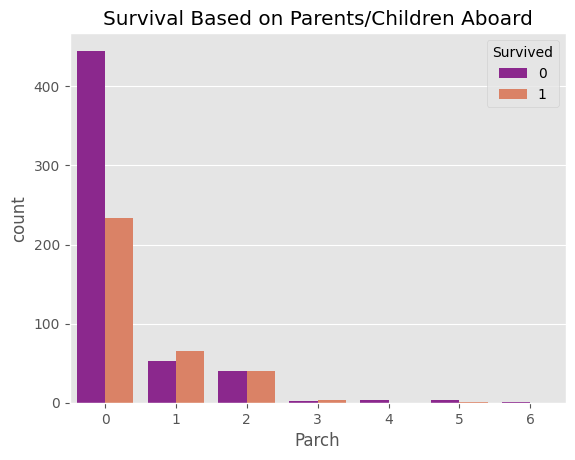

In [145]:
sns.countplot(x = 'Parch', hue = 'Survived' , data = titanic_train , palette='plasma')
plt.title('Survival Based on Parents/Children Aboard')

In [10]:
cross_tab = pd.crosstab(index = titanic_train['Sex'], columns = titanic_train['Survived'])

cross_tab

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Survived', ylabel='Pclass'>

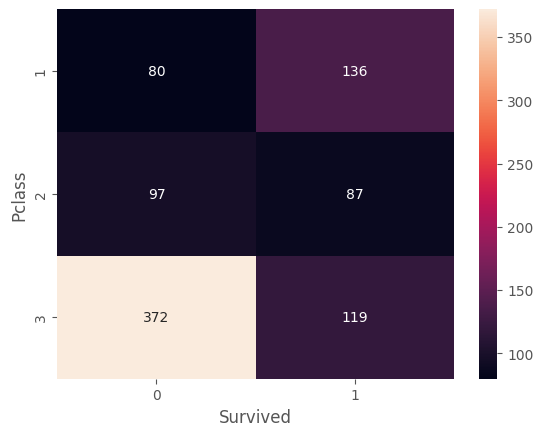

In [168]:
cross_tab = pd.crosstab(index = titanic_train['Pclass'], columns = titanic_train['Survived'])

sns.heatmap(cross_tab, annot = True, fmt = 'd')

<Axes: xlabel='Survived', ylabel='Embarked'>

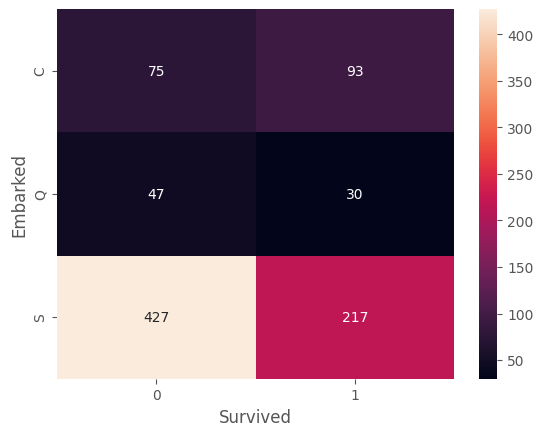

In [169]:
cross_tab = pd.crosstab(index = titanic_train['Embarked'], columns = titanic_train['Survived'])

sns.heatmap(cross_tab, annot = True, fmt = 'd')

<Axes: xlabel='Survived', ylabel='SibSp'>

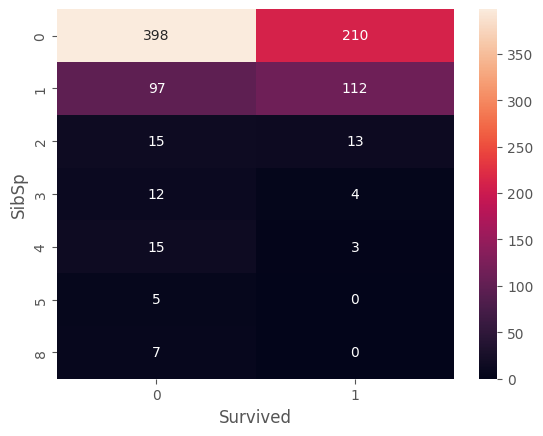

In [177]:
cross_tab = pd.crosstab(index = titanic_train['SibSp'], columns = titanic_train['Survived'])

sns.heatmap(cross_tab, annot = True, fmt = 'd')

<Axes: xlabel='Survived', ylabel='Parch'>

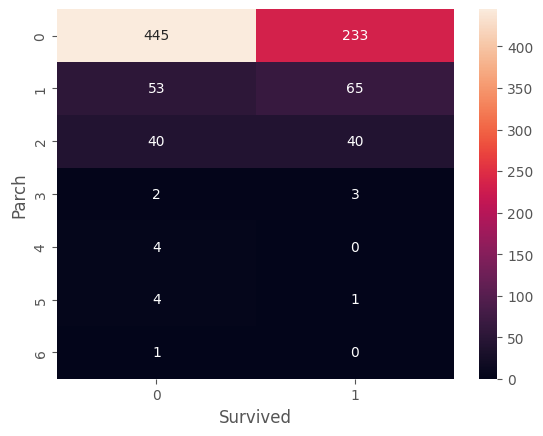

In [179]:
cross_tab = pd.crosstab(index = titanic_train['Parch'], columns = titanic_train['Survived'])

sns.heatmap(cross_tab, annot = True, fmt = 'd')

<Axes: xlabel='Survived', ylabel='Family_size'>

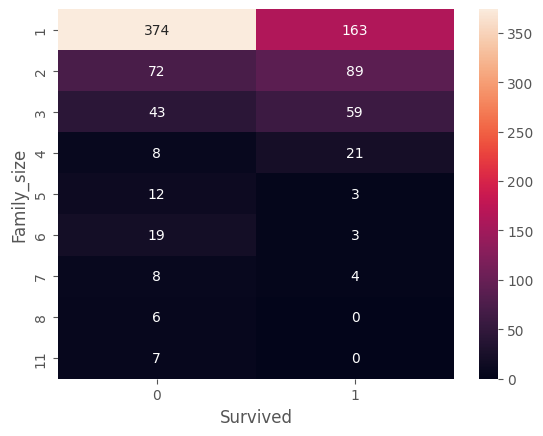

In [180]:
cross_tab = pd.crosstab(index = titanic_train['Family_size'], columns = titanic_train['Survived'])

sns.heatmap(cross_tab, annot = True, fmt = 'd')